# Data Visualization

Sometimes looking at tables just doesn't cut it, sometimes we need visual aids.

Looking at Data in new ways allows us to see new relationships or patterns that aren't easy to see with just numbers.

Maybe you need to make a presentation to stakeholders, this is where Data visualization comes in.

There are many options to choose from to do data visualization in `Python`, some libraries are:

* Matplotlib
* Seaborn
* Bokeh
* Plotly
* Altair

They all have pros and cons, but most of them are wrappers over matplotlib

## Pie Chart

Pie charts are ubiquitous, you see them in college classes, quarterly reports, in the newspaper and even memes.

They are used to demonstrate proportion.

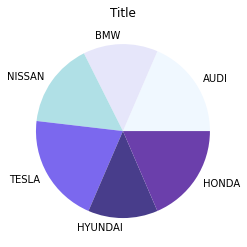

In [9]:
# Let's import matplotlib
import matplotlib.pyplot as plt

#Creating the dataset
cars = ['AUDI', 'BMW', 'NISSAN', 
        'TESLA', 'HYUNDAI', 'HONDA'] 
data = [20, 15, 17, 22, 14, 20] 
#Creating the pie chart
plt.pie(data, labels = cars,colors = 
        ['#F0F8FF','#E6E6FA','#B0E0E6','#7B68EE','#483D8B','#6B3FAB'])
#Adding the aesthetics
plt.title('Title')
#Show the plot
plt.show()